# Lab 4: Linear regression
## BIOS 26210 fall 2022
## Name: Robert Sucholeiki


In this assignment you will write your own functions to perform linear regression and polynomial regression and apply them to a real data set.

In [1]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy import stats
import pandas as pd

## Part 1: Linear regression

### Q1.1 Write your own linear regression function 

* Inputs: array with two vectors (X and Y) for the explanatory and response data. Make sure to check that they are the same length!

* DO: calculate  the slope and intercept of the best-fit line, and the coefficient of determination $r^2$.

* Outputs: the best-fit slope, intercept, and the coefficient of determination $r^2$.

To calculate the slope and intercept, solve the normal equation below, where $\vec \beta$ is the vector of parameters (slope and intercept), $M$ is the matrix containing a column of x values and a column of ones, $M^T$ is its transpose, and $y$ is the column vector of y values:

$$
(M^T M) \vec \beta = M^T y
$$

To calculate the coefficient of determination, you can use either the definition:

$$ r^2 = \frac{Cov(X,Y)^2}{Var(X)Var(Y)}$$

or the fact that the coefficient of determination determines the fraction of variance explained by linear regression:

$$ r^2 = \frac{Var(\hat Y)}{Var(Y)} $$

where $\hat Y$ is the predicted response values: $\hat Y = aX + b$

You may find the following numpy functions useful for performing array calculations:

* .T for array transpose

* np.column_stack() for stacking column vectors together https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html

* np.linalg.solve() for inverting a matrix https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html

* np.var() for calculating the variance of a vector or matrix https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.var.html (Please note you have to specify ddof=1 otherwise variance will be incorrect!)

* np.cov() for calculating the covariance between vectors https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html


Test your function on the simulated data below and make sure it returns the same values as the `linregress` function.

slope from my function:      0.5296847226701438
intercept from my function:  -10.178497192014996
R^2 from my function:        0.6991944606275047

linregress slope:           0.5296847226701494
linregress intercept:       -10.178497192015023
linregress R^2:             0.69919446062752


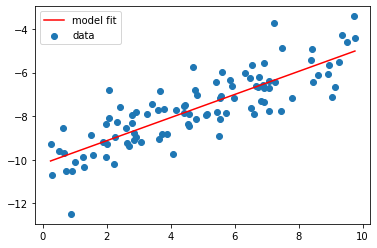

In [102]:
#Linear regression function
def regression_func(x , y): #Input x and y arrays
    Column2 = np.ones(len(x)) #Create an array of 1s the same length as x
    M = np.column_stack((x, Column2)) #Create a matrix M with first column x and second column of 1s
    MT = M.transpose() #Find MT, the transpose of M
    I = np.linalg.inv(MT@M) #Find I, the inverse of MT*M
    B = I@MT@y #Find B, the array with slope and intercept
    a_slope = B[0] #Define slope
    b_intercept = B[1] #Define intercept
    y_predicted = a_slope*x + b_intercept
    r_squared = np.var(y_predicted, ddof=1) / np.var(y, ddof=1)
    return a_slope, b_intercept, r_squared #Return slope, intercept, and r squared

#Create a scatterplot with noise
a = 0.5 # slope
b = -10 # intercept
w = 1 # noise strength
numpoints = 100 # number of data points
rng = np.random.RandomState(3)
x = np.sort(10*rng.rand(numpoints)) # random x values between 0 and 10
y = a * x + b + w*rng.randn(numpoints) # linear model plus random normal noise
plt.scatter(x, y, label='data')


#Perform linear regression with my function
a_slope, b_intercept, r_squared = regression_func(x , y)
print("slope from my function:     ", a_slope)
print("intercept from my function: ", b_intercept)
print("R^2 from my function:       ", r_squared)
print()

yfit = x*a_slope + b_intercept
plt.plot(x, yfit, 'r', label = 'model fit')
plt.legend()
plt.show

#Check with linregress function
slope, intercept, r, p_value, std_err = stats.linregress(x,y)
print("linregress slope:          ", slope)
print("linregress intercept:      ", intercept)
print("linregress R^2:            ", r**2)

### Q1.2 Residuals of linear regression

Plot the residuals of the predictions obtained from the linear regression model and report the fraction of total variance that is in the residuals (it should be complementary to the coefficient of determination R-squared). Plot the histogram of the residuals to see if it has a normal shape.

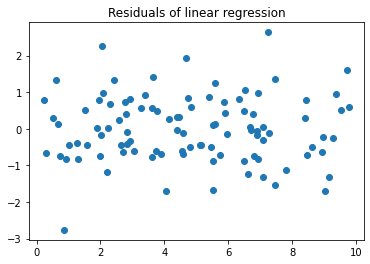

Fraction of total variance in the residuals =  0.30080553937248056


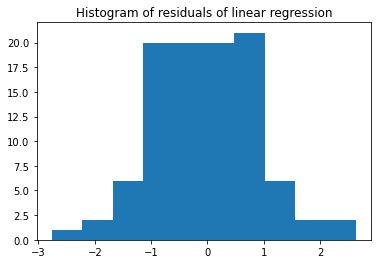

In [103]:
residuals = y - yfit

plt.scatter(x, residuals)
plt.title('Residuals of linear regression')
plt.show()

fraction_var = (np.var(residuals, ddof=1)) / (np.var(y, ddof=1))
print("Fraction of total variance in the residuals = ", fraction_var)

plt.hist(residuals)
plt.title('Histogram of residuals of linear regression')
plt.show()

Plotting the residuals for our regression visually shows that the residuals have no correlation with x. This follows one of the assumptions of a linear regression, which is that there is no correlation of the residuals to the explanatory variable. The total variance in the residuals is .30081 which is equal to 1 - r^2. The histogram of residuals follows a normal distribution, which conforms to our assumptions for linear regression. 

### Q1.3 Signal, noise, and correlation

Generate new data sets with increasing amount of noise (parameter w) and report how it affects the coefficient of determination; specifically, what is the threshold value of w to make R^2 less than 0.5? less than 0.1?


For noise (w) =  1.7
slope from my function:      0.5732033935762553
intercept from my function:  -10.627390010494462
R^2 from my function:        0.47114113127468393



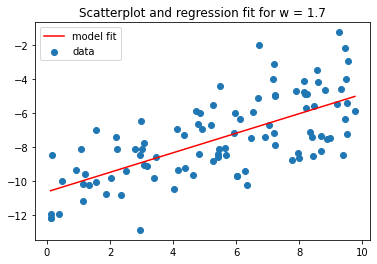

For noise (w) =  3.5
slope from my function:      0.4851135482295875
intercept from my function:  -9.224838701552166
R^2 from my function:        0.09835251436889278



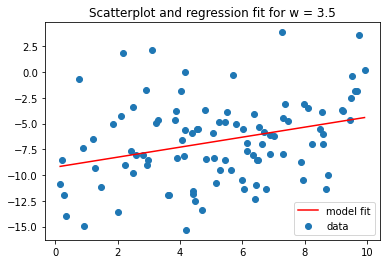

In [104]:
#EXAMPLE 1: w = 1.55, r^2 < .5
a = 0.5 # slope
b = -10 # intercept
w = 1.7 # noise strength
numpoints = 100 # number of data points
rng = np.random.RandomState(39)
x = np.sort(10*rng.rand(numpoints)) # random x values between 0 and 10
y = a * x + b + w*rng.randn(numpoints) # linear model plus random normal noise
plt.scatter(x, y, label='data')


#Perform linear regression with my function
a_slope, b_intercept, r_squared = regression_func(x , y)
print("For noise (w) = ", w)
print("slope from my function:     ", a_slope)
print("intercept from my function: ", b_intercept)
print("R^2 from my function:       ", r_squared)
print()

yfit = x*a_slope + b_intercept
plot1 = plt.plot(x, yfit, 'r', label = 'model fit')
plt.title('Scatterplot and regression fit for w = ' + str(w))
plt.legend()
plt.show(plot1)


#EXAMPLE 1: w = 2, r^2 < .1
a = 0.5 # slope
b = -10 # intercept
w = 3.5 # noise strength
numpoints = 100 # number of data points
rng = np.random.RandomState(38)
x = np.sort(10*rng.rand(numpoints)) # random x values between 0 and 10
y = a * x + b + w*rng.randn(numpoints) # linear model plus random normal noise
plt.scatter(x, y, label='data')


#Perform linear regression with my function
a_slope, b_intercept, r_squared = regression_func(x , y)
print("For noise (w) = ", w)
print("slope from my function:     ", a_slope)
print("intercept from my function: ", b_intercept)
print("R^2 from my function:       ", r_squared)
print()

yfit = x*a_slope + b_intercept
plot2 = plt.plot(x, yfit, 'r', label = 'model fit')
plt.title('Scatterplot and regression fit for w = ' + str(w))
plt.legend()
plt.show(plot2)

From running many trials, w = 1.7 is approximately the threshold at which r^2 is consistently below .5

w = 3.5 is approximately the threshold at which r^2 is consistently below .1

Overall, the larger the noise factor, the smaller our r^2 value will be due to poorer fit of the regression line to noisier data. 

## Part 2 Application to penguin data


The data set from the file `Macaroni_Penguin_Green.csv` (courtesy of Jonathan Green, see https://jeb.biologists.org/content/204/4/673.short)
is read in below into a pandas object.

Here is a good introduction to pandas: https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html


The data set contains four variables from observations on several individual macaroni penguins exercising on a treadmill. 

* group: BM (breeding male), BF (breeding female), MF (moulting female)
* ID: individual penguins ID code
* Heart Rate: measured during exercise in bpm
* Mass Specific VO2: oxygen consumption during exercise

Use your function from above to calculate linear regression between heart rate (explanatory) and oxygen consumption (response) on all of the penguins at once and report the slope, intercept, and R-squared. Use the .iloc factor (see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) to select these variables. Produce a plot of residuals and report whether it looks consistent with the assumptions of linear regression.

NOTE: the conversion between pandas objects and numpy array may need to be performed explicitly using `np.array()` function.

slope from my function:      0.18035385335380447
intercept from my function:  -2.8688217734098638
R^2 from my function:        0.4908281215079723


<function matplotlib.pyplot.show(close=None, block=None)>

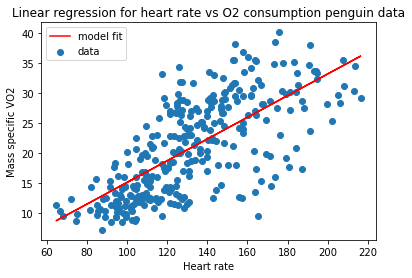

In [105]:
macaroni = pd.read_csv("Macaroni_Penguins_Green.csv") #Read in data file
macaroni.head()

x = np.array(macaroni.iloc[:,2]) #Define x as an array of heart rate values
y = np.array(macaroni.iloc[:,3]) #Define y as an array of O2 consumption values

a_slope, b_intercept, r_squared = regression_func(x , y) #Call in regression function
print("slope from my function:     ", a_slope)
print("intercept from my function: ", b_intercept)
print("R^2 from my function:       ", r_squared)

#Plot linear regression alongside scatterplot of data
yfit = x*a_slope + b_intercept 
plt.scatter(x, y, label='data') 
plt.plot(x, yfit, 'r', label = 'model fit')
plt.title('Linear regression for heart rate vs O2 consumption penguin data')
plt.xlabel('Heart rate')
plt.ylabel('Mass specific VO2')
plt.legend()
plt.show

The slope of the linear regression is approximately 0.18035. The intercept from the linear reagression is approximately -2.8688. The R^2 is approximately 0.4908.

### Q 2.2 Residuals analysis

Produce a plot of residuals as a function of the explanatory values and report whether it looks consistent with the assumptions of linear regression. Produce a histogram of residuals and answer the same question. Report the mean and variance of the residuals, and check that fraction of residual variance is complementary to the coefficient of determination.

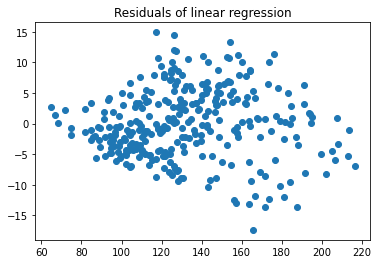

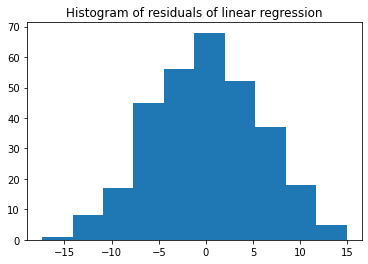

The mean of the residuals is -3.6846385515637766e-14
The variance of the residuals is 32.43630272713973

Fraction of total variance in the residuals =  0.509171878492036
1 - r^2 =  0.5091718784920277


In [106]:
#Plot residuals
residuals = y - yfit
residual_plot = plt.scatter(x, residuals)
plt.title('Residuals of linear regression')
plt.show(residual_plot)

#Histogram of residuals
plt.hist(residuals)
plt.title('Histogram of residuals of linear regression')
plt.show()

print("The mean of the residuals is", np.mean(residuals))
print("The variance of the residuals is", np.var(residuals, ddof=1))
print()

fraction_var = (np.var(residuals, ddof=1)) / (np.var(y, ddof=1))
print("Fraction of total variance in the residuals = ", fraction_var)
print("1 - r^2 = ", 1 - r_squared)

The residuals are a shapeless cloud with little observable correlation with the explanatory variable. This consistent with the assumptions of a linear regression, as a good linear regression should show no correlation between residuals and the explanatory variable.

The residuals appear to be normally distributed, which is consistant with this assumption of linear regressions.

The mean of the residuals is very close to zero (python reports this as -3.68x10^-14), approximately zero. The variance of the residuals is about 32.44

The fraction of total variance in the residuals is approximately .5092. This is equal to 1 - r^2. 



## Part 3 Polynomial regression

### Q 3.1 Write your own quadratic regression function 

Starting from the linear regression function, modify it to make a new function to perform a quadratic function fit.

* Inputs: array with two vectors (X and Y) for the explanatory and response data. Make sure to check that they are the same length!

* DO: calculate  the the best-fit parameters of a quadratic $Y = aX^2 + bX +c$ and the coefficient of determination $r^2$. Use the generalized normal equation to calculate the vector of parameters (a,b,c) and calculate the coefficient of determination as the ratio of predicted variance over the variance of the response variable (X).

* Outputs: the best-fit parameters a,b,c, and the coefficient of determination $r^2$.


Use your function to calculate quadratic regression between the oxygen consumption (Y) and heart rate (X) and report the best-fit parameters and R-squared. Make a plot of the data and the best-fit line over it. Is the fit substatially better than linear?


a from quadratic regression:   -0.0009806367779864446
b from quadratic regression:  0.4537164905590697
c from quadratic regression:  -20.934600017567995
R^2 from quadratic regression:  0.5122718448459048


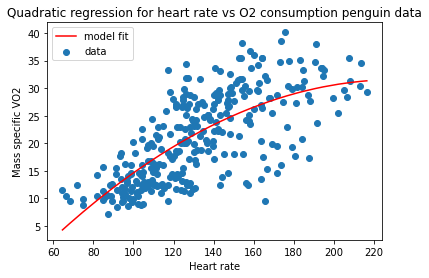

In [145]:
def quadratic_func(x , y): #Input x and y arrays
    x_squared = np.square(x)
    Column3 = np.ones(len(x)) #Create an array of 1s the same length as x
    M = np.column_stack((x_squared, x, Column3)) #Create a matrix M with first column x and second two columns of 1s
    MT = M.transpose() #Find MT, the transpose of M
    I = np.linalg.inv(MT@M) #Find I, the inverse of MT*M
    B = I@MT@y #Find B, the array with slope and intercept
    a = B[0] #Define a
    b = B[1] #Define b
    c = B[2] #Define c
    y_predicted = np.square(x)*a + b*x + c
    r_squared = np.var(y_predicted, ddof=1) / np.var(y, ddof=1)
    return a, b, c, r_squared #Return a, b, and c

x = np.array(macaroni.iloc[:,2]) #Define x as an array of heart rate values
y = np.array(macaroni.iloc[:,3]) #Define y as an array of O2 consumption values

a, b, c, r_squared = quadratic_func(x , y) #Call in regression function
print("a from quadratic regression:  ",  a)
print("b from quadratic regression: ",   b)
print("c from quadratic regression: ",   c)
print("R^2 from quadratic regression: ", r_squared)

#Plot linear regression alongside scatterplot of data
plt.scatter(x, y, label='data') 
x_sorted = np.sort(x) #Sort the x values in order to plot the fit line
yfit_sorted = a*(np.square(x_sorted)) + b*x_sorted + c #Plot the fit line with sorted values
plt.plot(x_sorted, yfit_sorted, 'r', label = 'model fit')
plt.title('Quadratic regression for heart rate vs O2 consumption penguin data')
plt.xlabel('Heart rate')
plt.ylabel('Mass specific VO2')
plt.legend()
plt.show()


The quadratic regression function has an a value of -0.0009806367779864446, b value of 0.4537164905590697, and c value of -20.934600017567995. The R^2 value is approximately .5123. This value is larger than the R^2 for the linear regression (.4908). This demonstrates that the quadratic regression function is a better fit than the linear regression. However, the difference in R^2 value is not very large, so the improvement in fit is fairly small. 

### Q 3.2 Residuals analysis

Produce a plot of residuals as a function of the explanatory values and report whether it looks consistent with the assumptions of linear regression. Produce a histogram of residuals and answer the same question. Report the mean and variance of the residuals, and check that fraction of residual variance is complementary to the coefficient of determination. Are the statistics of residuals substantially improved from the linear model?


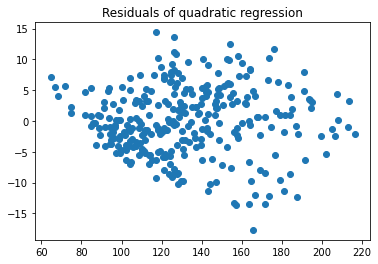

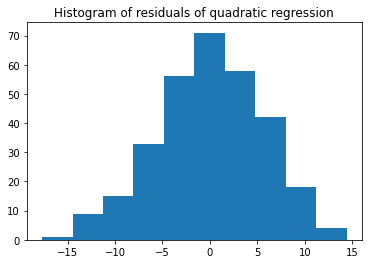

The mean of the residuals is -9.287511042534626e-13
The variance of the residuals is 31.070251043680162

Fraction of total variance in the residuals =  0.48772815515416185
1 - r^2 =  0.4877281551540952


In [147]:
#Calculate quadratic fit
yfit = a*(np.square(x)) + b*x + c

#Plot residuals
residuals = y - yfit
plt.scatter(x, residuals)
plt.title('Residuals of quadratic regression')
plt.show()

#Histogram of residuals
plt.hist(residuals)
plt.title('Histogram of residuals of quadratic regression')
plt.show()

print("The mean of the residuals is", np.mean(residuals))
print("The variance of the residuals is", np.var(residuals, ddof=1))
print()

fraction_var = (np.var(residuals, ddof=1)) / (np.var(y, ddof=1))
print("Fraction of total variance in the residuals = ", fraction_var)
print("1 - r^2 = ", 1 - r_squared)

From the residuals plot, we see that the residuals have no correlation with the explanatory variable. This is consistent with our expectations for a regression. 

We see from the histogram that the residuals are normally distributed, which conforms to expecations for a linear regression.

The mean of the residuals is approximately -9.2875x10^-13, which is very close to zero. The variance of the residuals is approximately 31.0703. 

Lastly, the fraction of total variance in the residuals is approximately .4877, which is equal to 1- r^2. 

Overall, the statistics of the resisduals are not substantially different from the linear model. Assumptions of regression are met for both models. The fraction of total variance in the residuals is smaller, but only slightly. In this case, a more complex model (quadratic) does not provide substantial utility over a linear model when it comes to regression. 